<div class="alert alert-block alert-info"> 
<h1><center> TSKS35: Information and Communications Engineering </center></h1>
<br>
<h2><center><font size="5">Laboratory Exercise 2: Frequency analysis and sampling</font></center></h2>
</div>




Communication signals and systems can be characterised in both time and the frequency domains. Frequency domain representations are particularly useful when analyzing linear systems (a large number of communication channels can be modeled closely by linear systems) as the system behavior and signal transformations are more convenient and intuitive when working in the frequency domain. 

In this session, we will revisit the frequency domain analysis of signals, power- and energy-type signals, the Sampling Theorem, bandpass signals, and lowpass representation of bandpass signals.

__NOTE:__ Revisit sections 2.3, 2.4, and 2.5 of the course book before the session.


### Power and Energy 

The energy content of a signal $x(t)$, denoted by $E_x$, is defined as

<center>$E_x=\int_{-\infty}^{\infty} |x(t)|^2 dt$<center>
    
and the power content of a signal is

<center>$P_x=\underset{T\rightarrow \infty}{\lim}\int_{-T/2}^{T/2} |x(t)|^2 dt$<center>

<div class="alert alert-block alert-success"> 
<font size="5"><span style="color:green"> Student task 1: Power- and energy-type signals</span></font>
    
Consider the signal generated in the code snippet below.
    
1. Write a program to calculate the energy and power of the signal. 
2. Calculate the (time-average) autocorrelation function of the signal and plot it.
3. Calculate the energy/power spectrum and plot it.

__Hint:__ Check numpy.correlate function [here](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html) and fourier transforms numpy.fft.fft [here](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html) 

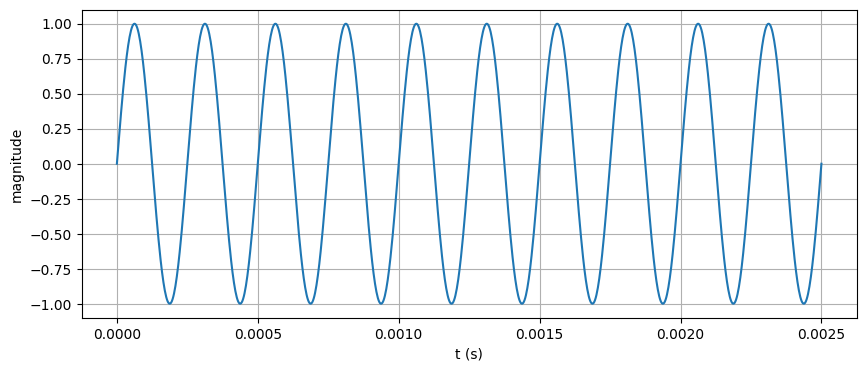

In [13]:
import numpy as np
import matplotlib.pyplot as plt
f = 4000  # frequency in Hz
T=1/f
t = np.linspace(0, 10*T, 1000)
s = np.sin(2 * np.pi * f * t)
plt.figure(figsize=(10, 4))
plt.plot(t, s)
plt.xlabel("t (s)")
plt.ylabel("magnitude")
plt.grid(True)
plt.show()

If the signal is inf then the energy is inf but if the time is only 1/4000 then the energy of the signal is: [499.5]
If the signal is finite then the power is 0 but if not then the Power of the signal is: [0.4995]


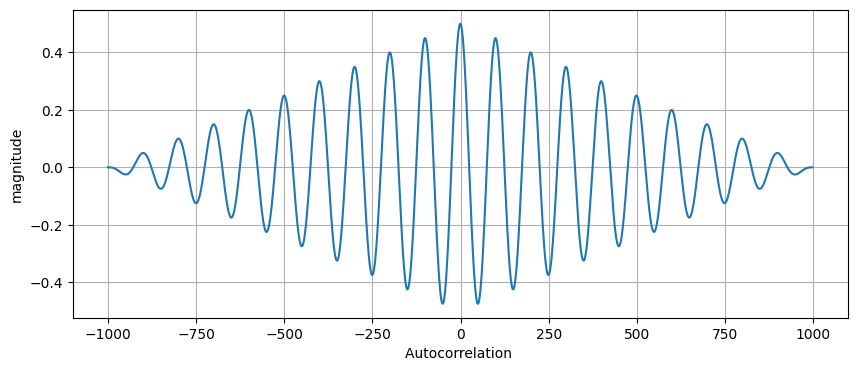

1999


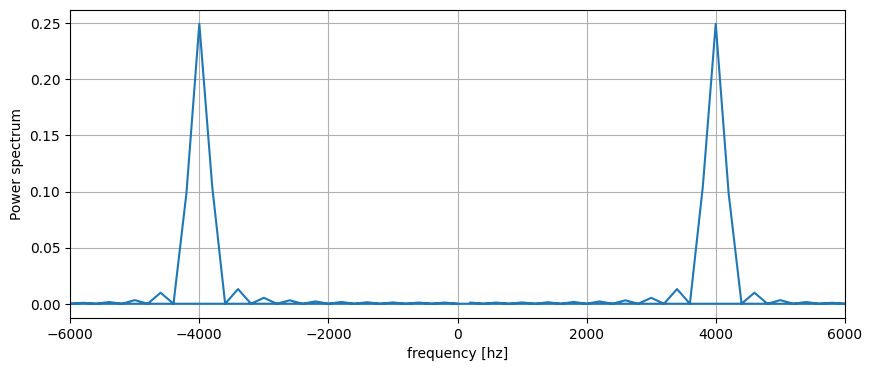

In [4]:
## Write your code here......
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
f = 4000  # frequency in Hz
T=1/f
t = np.linspace(0, 10*T, 1000)
s = np.sin(2 * np.pi * f * t)

energy = np.correlate(s, s, 'valid')
power = np.correlate(s, s, 'valid') / len(s)

print(f"If the signal is inf then the energy is inf but if the time is only 1/4000 then the energy of the signal is: {energy}")
print(f"If the signal is finite then the power is 0 but if not then the Power of the signal is: {power}")

autocorrelation = np.correlate(s, s, 'full')/len(s)

plt.figure(figsize=(10, 4))
plt.plot(range(-1000, 999), autocorrelation)
plt.xlabel("Autocorrelation ")
plt.ylabel("magnitude")
plt.grid(True)
plt.show()

powerSpectrum = np.abs(np.fft.fft(autocorrelation/1000))
freq = np.fft.fftfreq(len(autocorrelation), d=t[0]-t[1])

plt.figure(figsize=(10, 4))
plt.plot(freq, powerSpectrum)
plt.xlabel("frequency [hz]")
plt.ylabel("Power spectrum")
plt.xlim(-6000, 6000)
plt.grid(True)
plt.show()


### Sampling Theorem

Let the signal $x(t)$ be bandlimited with bandwidth $W$; i.e., $X(f)=0$ for $|f|\geq W$. Let $x(t)$ be sampled at multiples of some basic sampling interval $T_s$, where $T_s\leq\tfrac{1}{2W}$.     Then, it is possible to reconstruct the original signal $x(t)$ back from the sampled values by the reconstruction filter, which is an ideal low pass filter with bandwith $W'$, given by

$\nonumber x(t)=\sum_{n=-\infty}^{\infty} 2W' T_s x(n T_s) \mathrm{sinc}\left[2W' (t-nT_s)\right],$

where $W'$ is any arbitrary number that satisfies $W\leq W'\leq\dfrac{1}{T_s}-W$ and $f_s=2W$ is the minimum sampling rate (Nyquist sampling rate) at which no aliasing occurs.

The code snippet below illustrates the process of sampling the monochromatic signal $x(t)$ with spectrum $X(f)$

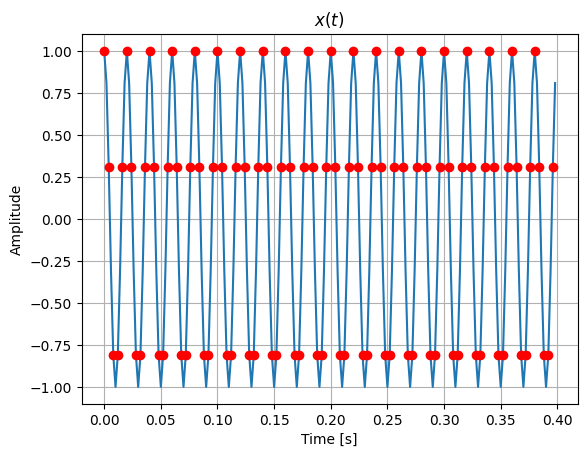

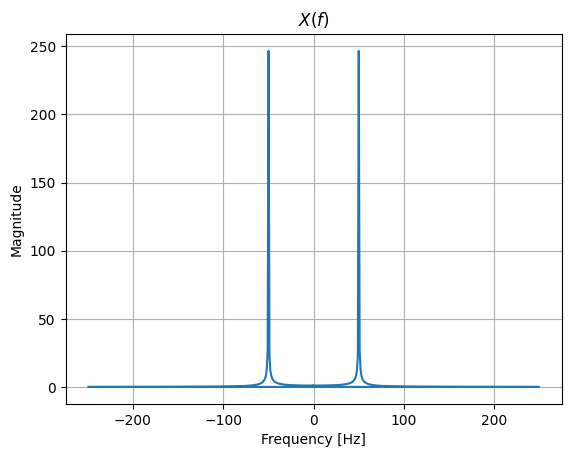

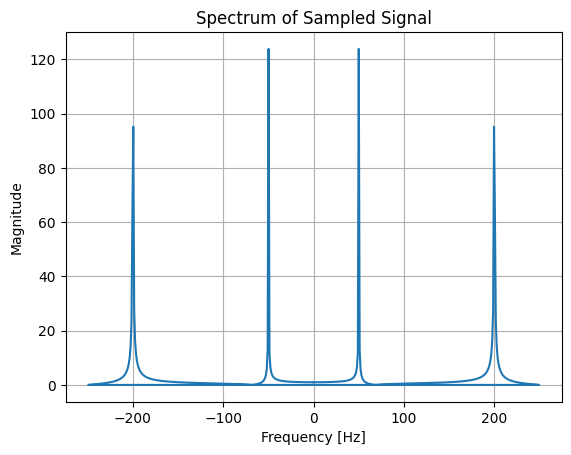

In [15]:
##Example

f1 = 50
f=10*f1
t = np.arange(0, 1+1/f, 1/f)


##Time domain signal
time_domain_signal =  np.cos(2*np.pi*f1*t)

##Frequency domain signal
frequency_domain_signal = np.fft.fft(time_domain_signal)
frequencies1 = np.fft.fftfreq(len(frequency_domain_signal), 1/f)

##Generate sampled signal
impulse_train = np.zeros_like(t)
impulse_train[::2] = 1
sampled_signal=impulse_train*time_domain_signal

#plt.stem(t, impulse_train*time_domain_signal,'r', markerfmt='ro')

##Frequency domain sampled signal
frequency_domain_sampled_signal = np.fft.fft(sampled_signal)
frequencies2 = np.fft.fftfreq(len(frequency_domain_sampled_signal),1/f)

##Plot of the time domain signal
sl = slice(200)
plt.plot(t[sl], time_domain_signal[sl])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('$x(t)$')
plt.grid(True)

##Plot of the sampled signal
sampled_signal_plot=sampled_signal.copy()
sampled_signal_plot[sampled_signal_plot==0 ] = np.nan
plt.plot(t[sl], sampled_signal_plot[sl],'ro')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('$x(t)$')
plt.grid(True)
plt.show()

##Plot of the spectrum of original signal
plt.plot(frequencies1, np.abs(frequency_domain_signal))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('$X(f)$')
plt.grid(True)
plt.show()

##Plot of the spectrum of sampled signal
plt.plot(frequencies2, np.abs(frequency_domain_sampled_signal))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Spectrum of Sampled Signal')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success"> 
<font size="5"><span style="color:green"> Student task 2: Sampling</span></font>
    
Consider the example above.
    
1. Write a program to the sampling of a two-tone signal, with frequencies $f_1=10$ Hz and $f_2=60$ Hz. 
2. Verify how to change the sampling rate and observe the results.

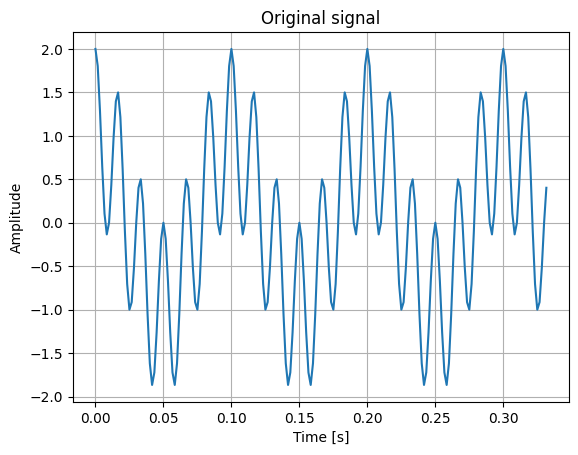

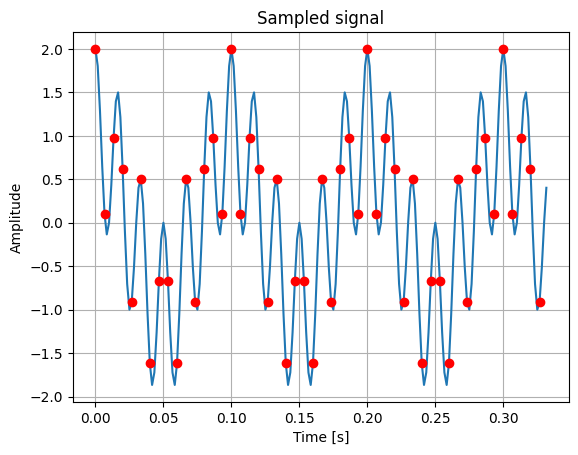

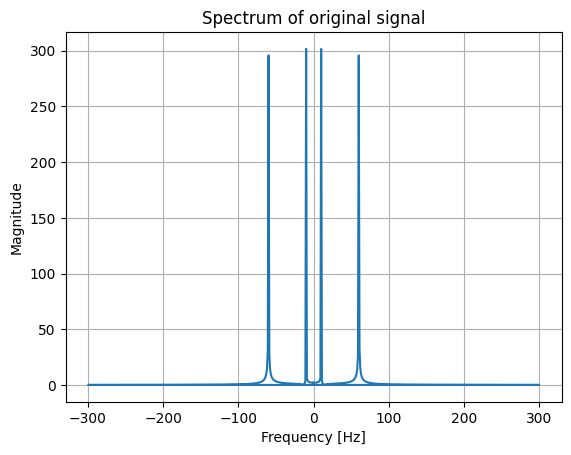

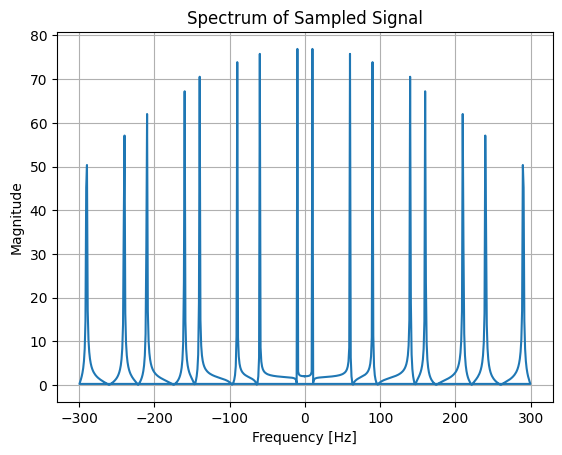

In [16]:
### Write your code here...
import numpy as np
import matplotlib.pyplot as plt

f1 = 10
f2 = 60
f=10*f2
t = np.arange(0, 1+1/f, 1/f)


##Time domain signal
time_domain_signal =  np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t)

##Frequency domain signal
frequency_domain_signal = np.fft.fft(time_domain_signal)
frequencies1 = np.fft.fftfreq(len(frequency_domain_signal), 1/f)

##Plot of the time domain signal
sl = slice(200)
plt.plot(t[sl], time_domain_signal[sl])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Original signal')
plt.grid(True)
plt.show()

# ##Generate sampled signal
impulse_train = np.zeros_like(t)
impulse_train[::4] = 1
sampled_signal=impulse_train*time_domain_signal

##Frequency domain sampled signal
frequency_domain_sampled_signal = np.fft.fft(sampled_signal)
frequencies2 = np.fft.fftfreq(len(frequency_domain_sampled_signal),1/f)


# ##Plot of the sampled signal
sampled_signal_plot=sampled_signal.copy()
sampled_signal_plot[sampled_signal_plot==0 ] = np.nan
plt.plot(t[sl], time_domain_signal[sl])
plt.plot(t[sl], sampled_signal_plot[sl],'ro')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sampled signal')
plt.grid(True)
plt.show()

##Plot of the spectrum of original signal
plt.plot(frequencies1, np.abs(frequency_domain_signal))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Spectrum of original signal')
plt.grid(True)
plt.show()

##Plot of the spectrum of sampled signal
plt.plot(frequencies2, np.abs(frequency_domain_sampled_signal))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Spectrum of Sampled Signal')
plt.grid(True)
plt.show()

### Bandpass signals and lowpass representation

A bandpass or narrowband signal is a signal $x(t)$ whose frequency domain representation $X(f)$ is nonzero for frequencies in a usually samll neighborhood of some high frequency $f_0$; i.e. $X(f)=0$ for $|f-f_0|\geq W$, $W<f_0$.

To obtain the lowpass representation of a bandpass signal $x(t)$, we start by obtaining the analytical signal $z(t)=x(t)+j\hat{x}(t)$, where $\hat{x}(t)=\tfrac{1}{\pi t}\ast x(t)$. Then, the lowpass equivalent signal will be $x_l(t)=z(t)e^{-j2\pi f_0}t$ 

<div class="alert alert-block alert-success"> 
<font size="5"><span style="color:green"> Student task 3: Bandpass signals and lowpass representation</span></font>
    
    
1. Generate a two-tone ($f_1=f_0-10$ Hz and $f_2=f_0+10$ Hz) cosine signal centered at $f_0=5$ kHz. 
2. Plot $X(f)$, $Z(f)$ and $X_l(f)$.

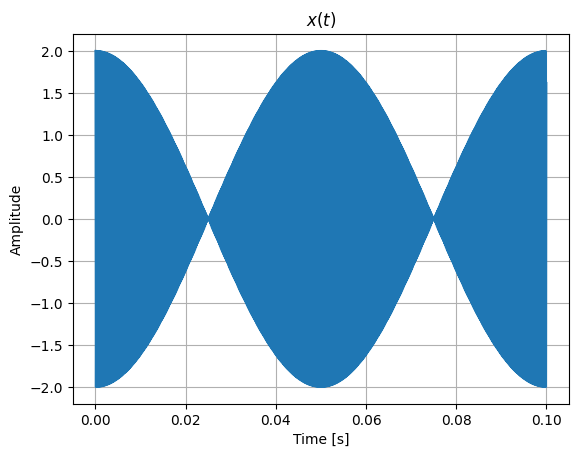

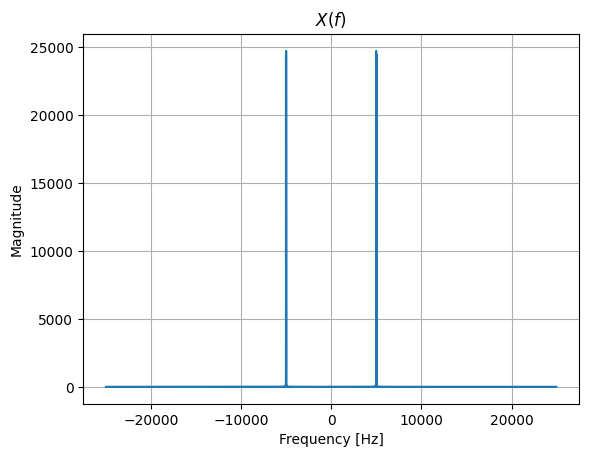

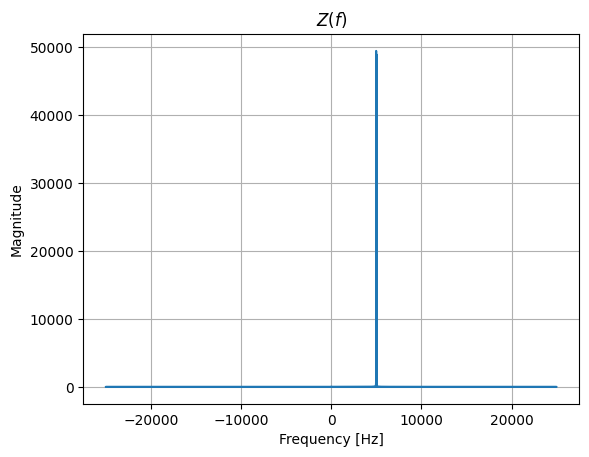

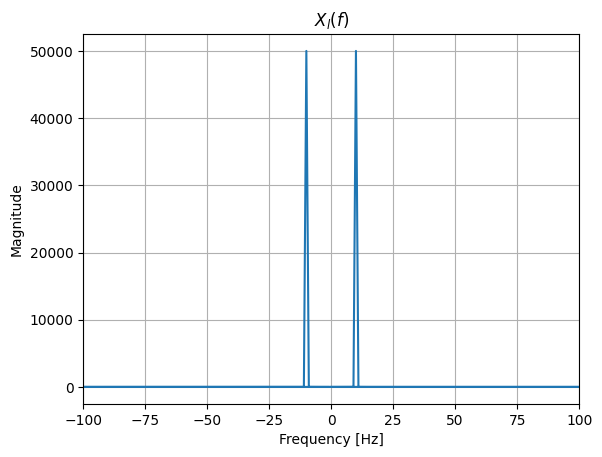

In [17]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
### Write your code here...
f0 = 5000
f1 = f0 - 10
f2 = f0 + 10

f = 10 * f0

t = np.arange(0, 1+1/f, 1/f)

##Time domain signal
time_domain_signal =  np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t)

##Frequency domain signal
frequency_domain_signal = np.fft.fft(time_domain_signal)
frequencies1 = np.fft.fftfreq(len(frequency_domain_signal), 1/f)

##Analytical signal
analytical_signal = time_domain_signal + 1j*np.imag(hilbert(time_domain_signal))
frequency_analytical_signal = np.fft.fft(analytical_signal)
frequencies2 = np.fft.fftfreq(len(frequency_analytical_signal), 1/f)


##lowpass equivalent signal
lowpass_equivalent_signal = analytical_signal * np.exp(-1j * 2 * np.pi * f0 * t)
frequency_equivalent_signal = np.fft.fft(lowpass_equivalent_signal)
frequencies3 = np.fft.fftfreq(len(frequency_equivalent_signal), 1/f)




##Plot of the time domain signal
sl = slice(5000)
plt.plot(t[sl], time_domain_signal[sl])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('$x(t)$')
plt.grid(True)
plt.show()


##Plot of the spectrum of original signal
plt.plot(frequencies1, np.abs(frequency_domain_signal))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('$X(f)$')
# plt.xlim(4900, 5100)
plt.grid(True)
plt.show()

##Plot of the spectrum of analytical signal
plt.plot(frequencies2, np.abs(frequency_analytical_signal))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('$Z(f)$')
# plt.xlim(4900, 5100)
plt.grid(True)
plt.show()

##Plot of the spectrum of analytical signal
plt.plot(frequencies3, np.abs(frequency_equivalent_signal))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('$X_l(f)$')
plt.xlim(-100, 100)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info"> 
<h2><center> Report of Laboratory Excercise 2 </center></h2>
<br>

Answer the following questions supporting your claims with formulations and figures obtained from the Student Tasks. Add your codes at the end as appendix.
    
__NOTE:__ You should prepare these questions up to the next laboratory session. Teaching assistants will verify your progress during next session. Final report should be uploaded to Lisam in pdf format according to laboratory session's guidelines. 
    
1. Explain what is an energy- and power-type signal and their characteristics. Is the signal from Student Task 1 a power- or energy-type signal? Why is it called time-average autocorrelation function, and what is the power spectrum? (2pt)
2. What happen at different sampling rates in Student Task 2? What is the aliasing distortion? (2pt)
3. What is the lowpass representation of a bandpass signal? (1pt)
</div>

## Answers to the lab questions

### 1

A energy-type signal has finite energy so its power must be zero, a power-type signal has a finite average power so the energy must be infinite. 

If it is a finite signal that just exists during the time T, then it is an energy signal with the power 0. If the signal continues to infinity both directions then it is a power signal with an infinite energy.

The time-average autocorrelation function calculates the average correlation between a signal and its time-shifted versions over a long period of time.

The power spectrum is the power of the Fourier-transformed signal, so we get the power depending on the frequency for the signal.

### 2

As long as the sampling rate exceeds the Nyqvist sample rate of 2*f then the fft looks the same. Under the Nyqvist sample rate it distorts, causing frequencies in the frequency spectrum that are not actually there.


### 3

The lowpass representation of a bandpass signal is the signal and only focuses on the complex envelope. This has all the information from the original but centered at 0 hz. Which makes it easier to work with. 


